In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dataset = pd.read_csv('./diabetes.csv')

In [94]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
#Extract inputs and output
y = dataset.pop('Outcome')
x = dataset.copy()
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [96]:
# PROBLEM 1

# 80% Training split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
419,3,129,64,29,115,26.4,0.219,28
465,0,124,56,13,105,21.8,0.452,21
134,2,96,68,13,49,21.1,0.647,26
141,5,106,82,30,0,39.5,0.286,38
361,5,158,70,0,0,29.8,0.207,63


In [97]:
# Feature Scaling (Standardization)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [98]:
X_train[0:9]

array([[-0.24511713,  0.24273066, -0.27890499,  0.54082774,  0.34182184,
        -0.70512921, -0.77522336, -0.44173213],
       [-1.15724994,  0.08528652, -0.69130152, -0.45937778,  0.25183787,
        -1.3012818 , -0.02450073, -1.0419739 ],
       [-0.5491614 , -0.79640068, -0.07270672, -0.45937778, -0.25207236,
        -1.39200067,  0.60378644, -0.61322978],
       [ 0.36297142, -0.48151239,  0.64898722,  0.60334058, -0.69299381,
         0.99260968, -0.55935033,  0.4157561 ],
       [ 0.36297142,  1.15590668,  0.03039242, -1.27204475, -0.69299381,
        -0.26449469, -0.81388719,  2.55947669],
       [-0.85320567,  0.14826417, -0.69130152,  0.54082774,  0.67476253,
        -0.40705292,  1.09997222, -1.0419739 ],
       [ 1.57914851, -0.29257942,  0.64898722,  0.22826351, -0.69299381,
        -0.47185211,  2.64974726,  1.44474198],
       [-0.85320567, -0.45002357, -1.00059892, -0.08430071, -0.69299381,
        -0.45889227, -0.89765881, -0.35598331],
       [ 2.18723705,  0.43166363

In [99]:
# Logisitic Regression
classifier = LogisticRegression(penalty='none',random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(penalty='none', random_state=0)

In [100]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [101]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[92, 13],
       [16, 33]], dtype=int64)

In [102]:
# Evaluate accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8116883116883117
Precision: 0.717391304347826
Recall: 0.673469387755102


Text(0.5, 257.44, 'Predicted label')

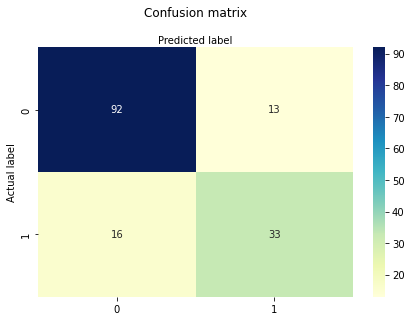

In [103]:
# Visualize confusion matrix using Heatmap
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
# PROBLEM 2

sc_Data = StandardScaler()
x_stand = sc_Data.fit_transform(x)

In [105]:
# K-Fold Cross Validation
# K = 5
k5fold = KFold(n_splits=5, random_state=0, shuffle=True)

# Used 'newton-cg' solver so there are no penalties being used
model5 = LogisticRegression(penalty='none', solver='newton-cg')

results5 = cross_val_score(model5, x_stand, y, cv=k5fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results5.mean()*100, results5.std()*100))

Accuracy: 77.471% (2.893%)


In [106]:
# K = 10
k10fold = KFold(n_splits=10, random_state=0, shuffle=True)

# Used 'newton-cg' solver so there are no penalties being used
model10 = LogisticRegression(penalty='none', solver='newton-cg')

results10 = cross_val_score(model10, x_stand, y, cv=k10fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results10.mean()*100, results10.std()*100))

Accuracy: 77.604% (5.036%)
